In [1]:
import numpy as np

from SubsidieModel import SubsidieModel

model1 = SubsidieModel()

In [2]:
x, y = 0, 0 # Example position, you can change it to any position
agent_at_position = model1.grid.get_cell_list_contents((x, y))
if agent_at_position:
    print("Agent Type at position (", x, ",", y, "):", agent_at_position[0].agent_type)
else:
    print("No agent at position (", x, ",", y, ")")

Agent Type at position ( 0 , 0 ): TypeAdopter.EARLY_ADOPTER


In [3]:
for x in range(50):
    for y in range(50):
        if model1.grid.is_cell_empty((x, y)):
            print("Cel op positie (", x, ",", y, ") is leeg.")

In [4]:
from SubsidieModel import count_type, TypeAdopter


a = count_type(model1, TypeAdopter.INNOVATOR)
print(a)
b = count_type(model1, TypeAdopter.EARLY_ADOPTER)
print(b)
c = count_type(model1, TypeAdopter.EARLY_MAJORITY)
print(c)
d = count_type(model1, TypeAdopter.LATE_MAJORITY)
print(d)
e = count_type(model1, TypeAdopter.LAGGARDS)
print(e)

total = a+b+c+d+e
print(total)

63
338
847
851
401
2500


In [5]:
# Voer het model uit voor een bepaald aantal stappen
for i in range(100):
    model1.step()

# Haal de gegevens op van de datacollector
model_data = model1.datacollector.get_model_vars_dataframe()

# Toon de gegevens
print(model_data)


    Gemiddelde belangstelling  Aantal gekochte EV
0                    0.531452                   0
1                    0.535618                   0
2                    0.539785                   0
3                    0.543952                   0
4                    0.548118                   0
..                        ...                 ...
95                   0.924910                1764
96                   0.929077                1764
97                   0.933243                1764
98                   0.937410                1764
99                   0.941577                1764

[100 rows x 2 columns]


In [6]:
agent_data = model1.datacollector.get_agent_vars_dataframe()

print(agent_data)

                   Type Agent  Belangstelling  leeftijd auto
Step AgentID                                                
1    (0, 0)     EARLY_ADOPTER        0.462500             27
     (0, 1)         INNOVATOR        0.612500             51
     (0, 2)    EARLY_MAJORITY        0.575000             66
     (0, 3)    EARLY_MAJORITY        0.383333             20
     (0, 4)          LAGGARDS        0.504167             73
...                       ...             ...            ...
100  (49, 45)  EARLY_MAJORITY        1.008333            170
     (49, 46)  EARLY_MAJORITY        0.866667            136
     (49, 47)  EARLY_MAJORITY        1.054167            181
     (49, 48)  EARLY_MAJORITY        1.087500            189
     (49, 49)  EARLY_MAJORITY        1.187500            213

[250000 rows x 3 columns]


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
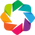

     Gemiddelde belangstelling  Aantal gekochte EV
0                     0.531452                   0
1                     0.535618                   0
2                     0.539785                   0
3                     0.543952                   0
4                     0.548118                   0
..                         ...                 ...
105                   0.966577                1764
106                   0.970743                1764
107                   0.974910                1764
108                   0.979077                1764
109                   0.983243                1764

[110 rows x 2 columns]


/Users/michielvanhouten/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


:HoloMap   [Default]
   :Image   [x,y]   (a)

In [7]:

import holoviews as hv
from collections import defaultdict

hv.extension('bokeh')

for i in range(10):
    model1.step()

model_data = model1.datacollector.get_model_vars_dataframe()

print(model_data)





def value(cell):
    if cell.belangstelling  < 0.8: return 15  
    elif cell.belangstelling > 0.8 and cell.belangstelling < 0.9: return 20
    elif cell.belangstelling > 0.9 : return 5

hmap = hv.HoloMap()  # draws the holoviews grid

for i in range(100):   
    model1.step()   # This will run the model for one step. Because of the for loop, the model will run for 100 steps in total!!!!!
    # Note: It is not a big problem if you don't completely understand the next few lines since these concern the holoviews library
    grid_dict = defaultdict(list)
    for content, row_index, col_index in model1.grid.coord_iter():
        grid_dict[row_index] += [content]  
    data = np.array([[value(c) for c in row] for row in grid_dict.values()])
    data = np.transpose(data)
    data = np.flip(data, axis=0)
    bounds=(0,0,5,5)   # Coordinate system: (left, bottom, right, top)
    hmap[i] = hv.Image(data, vdims=[hv.Dimension('a', range=(0,21))],bounds=bounds).relabel('Grid').opts(cmap='Viridis',xticks=[0],yticks=[0])
    # holoviews comes with different colormaps (cmap). In this case, we are using the colormap Viridis, which has a color scheme between blue and yellow.
hmap


